In [51]:
pip install Scikit-Learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import torch
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [16]:

db = pd.read_csv('IRIS_ Flower_Dataset.csv')


In [17]:
db_setosa = db.loc[db['species'] == 'Iris-setosa']
print(db_setosa.sort_values(by='sepal_length', ascending=False).head(10))

print('\n----------------------------------------------------\n')
print(db_setosa.sort_values(by='sepal_width', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_setosa.sort_values(by='petal_length', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_setosa.sort_values(by='petal_width', ascending=False).head(10))

    sepal_length  sepal_width  petal_length  petal_width      species
14           5.8          4.0           1.2          0.2  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
36           5.5          3.5           1.3          0.2  Iris-setosa
33           5.5          4.2           1.4          0.2  Iris-setosa
31           5.4          3.4           1.5          0.4  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa

----------------------------------------------------

    sepal_length  sepal_width  petal_length  petal_width      species
15           5.7          4.4           1.5          0.4  Iris-setosa
33           5.5          4.2      

In [18]:
db_versicolor = db.loc[db['species'] == 'Iris-versicolor']
print(db_versicolor.sort_values(by='sepal_length', ascending=False).head(10))

print('\n----------------------------------------------------\n')
print(db_versicolor.sort_values(by='sepal_width', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_versicolor.sort_values(by='petal_length', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_versicolor.sort_values(by='petal_width', ascending=False).head(10))

    sepal_length  sepal_width  petal_length  petal_width          species
50           7.0          3.2           4.7          1.4  Iris-versicolor
52           6.9          3.1           4.9          1.5  Iris-versicolor
76           6.8          2.8           4.8          1.4  Iris-versicolor
86           6.7          3.1           4.7          1.5  Iris-versicolor
77           6.7          3.0           5.0          1.7  Iris-versicolor
65           6.7          3.1           4.4          1.4  Iris-versicolor
58           6.6          2.9           4.6          1.3  Iris-versicolor
75           6.6          3.0           4.4          1.4  Iris-versicolor
54           6.5          2.8           4.6          1.5  Iris-versicolor
74           6.4          2.9           4.3          1.3  Iris-versicolor

----------------------------------------------------

    sepal_length  sepal_width  petal_length  petal_width          species
85           6.0          3.4           4.5          1.6 

In [19]:
db_virginica = db.loc[db['species'] == 'Iris-virginica']
print(db_virginica.sort_values(by='sepal_length', ascending=False).head(10))

print('\n----------------------------------------------------\n')
print(db_virginica.sort_values(by='sepal_width', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_virginica.sort_values(by='petal_length', ascending=False).head(10))
print('\n----------------------------------------------------\n')
print(db_virginica.sort_values(by='petal_width', ascending=False).head(10))

     sepal_length  sepal_width  petal_length  petal_width         species
131           7.9          3.8           6.4          2.0  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
118           7.7          2.6           6.9          2.3  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
117           7.7          3.8           6.7          2.2  Iris-virginica
105           7.6          3.0           6.6          2.1  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
107           7.3          2.9           6.3          1.8  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica

----------------------------------------------------

     sepal_length  sepal_width  petal_length  petal_width         species
131           7.9          3.8           6.4          2.0

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(db.drop(['species'],axis='columns'),db['species'],test_size=0.2)
model = RandomForestClassifier()

model.fit(X_train, y_train)


print(db['species'])


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [ ]:
model.score(X_test,y_test)

In [ ]:

y_pred_test = model.predict(X_test)

accuracy_score(y_test, y_pred_test)













In [ ]:
print(classification_report(y_test, y_pred_test))


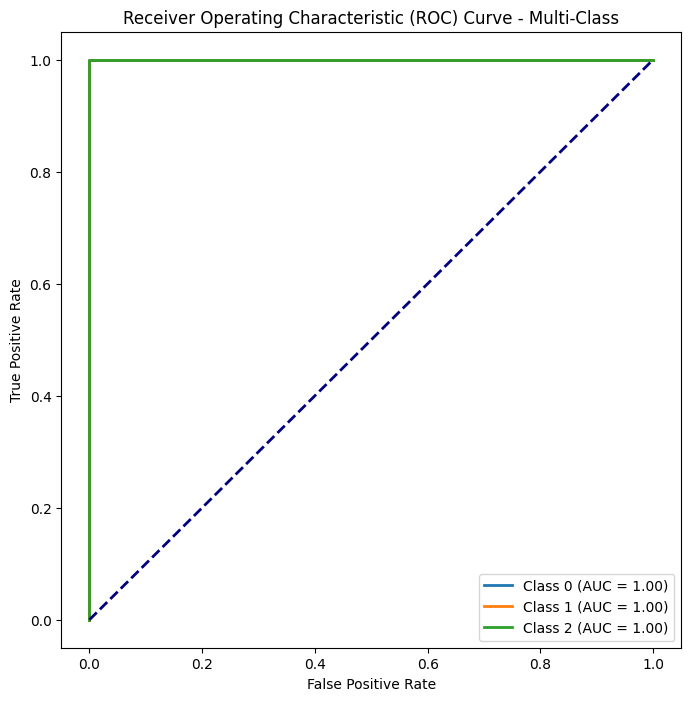

In [32]:
# Binarize the labels for multi-class ROC
y_train_bin = label_binarize(y_train, classes=db['species'].unique())
y_test_bin = label_binarize(y_test, classes=db['species'].unique())


# Predict probabilities
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# For each class
for i in range(len(db['species'].unique())):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 8))
for i in range(len(db['species'].unique())):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multi-Class')
plt.legend(loc='lower right')
plt.show()